In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./files_for_lab/customer_churn.csv')

In [3]:
data.shape

(7043, 21)

# Data exploration.

In [4]:
data1 = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]

In [5]:
data1.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [6]:
data1.shape

(7043, 4)

In [7]:
data1.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

In [8]:
data1['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [9]:
data1['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
data1['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [11]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
data1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

From the humbers we can see that, in this case, a model that predicts every individual as negative could already achieve an accuracy of more than 70%.

In [13]:
5174/(1869+5174)

0.7346301292063041

# Checking multicolinearity.

In [14]:
data1_num = data[['tenure', 'MonthlyCharges']]

In [15]:
corr_matrix = data1_num.corr()

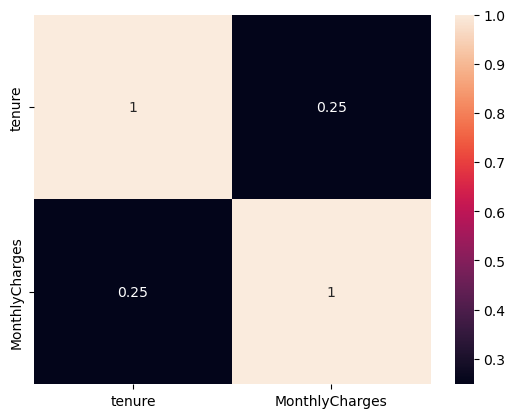

In [16]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# X-y split.

In [17]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [18]:
y = data['Churn']

# Train-test split.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) # default fraction is 0.2

# Scaling X_train_num.

In [20]:
X_train.shape

(5282, 3)

In [21]:
X_train_num = X_train[['tenure', 'MonthlyCharges']]

In [22]:
X_train_cat = X_train[['SeniorCitizen']]

In [23]:
index_num = X_train_num.index
index_cat = X_train_cat.index

In [24]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)

In [25]:
X_train_num_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

In [26]:
X_train_num_scaled.index = index_num
X_train_cat.index = index_cat

In [27]:
X_train_transf = pd.concat([X_train_num_scaled, X_train_cat], axis=1)

In [28]:
X_train_transf

,tenure,MonthlyCharges,SeniorCitizen
3188,0.111111,0.314428,0
5529,0.027778,0.017910,0
5165,0.013889,0.511443,1
2730,0.680556,0.879602,0
3517,0.972222,0.907960,0
...,...,...,...
45,0.680556,0.659204,0
1561,0.013889,0.564179,0
880,0.138889,0.913930,0
3886,1.000000,0.881592,1


# Scaling X_test_num.

In [29]:
X_test.shape

(1761, 3)

In [30]:
X_test_num = X_test[['tenure', 'MonthlyCharges']]

In [31]:
X_test_cat = X_test[['SeniorCitizen']]

In [32]:
index_test_num = X_test_num.index
index_test_cat = X_test_cat.index

In [33]:
X_test_num_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)

In [34]:
X_test_num_scaled.index = index_test_num
X_test_cat.index = index_test_cat

In [35]:
X_test_transf = pd.concat([X_test_num_scaled, X_test_cat], axis=1)

In [36]:
X_test_transf

,tenure,MonthlyCharges,SeniorCitizen
2293,1.000000,0.673632,0
6618,0.361111,0.680597,0
1484,0.986111,0.805473,1
2586,0.611111,0.013433,0
5341,0.013889,0.559204,1
...,...,...,...
5069,0.055556,0.568159,0
1434,0.166667,0.812935,0
245,0.055556,0.568159,1
3229,0.166667,0.755721,0


# Logistic regression model and results.

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train_transf, y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = logreg.predict(X_test_transf)

In [39]:
logreg.score(X_test_transf, y_test)

0.7961385576377058

In [40]:
print("precision: ",precision_score(y_test, pred, pos_label='Yes'))
print("recall: ",recall_score(y_test, pred, pos_label='Yes'))
print("f1: ",f1_score(y_test, pred, pos_label='Yes'))

precision:  0.6285714285714286
recall:  0.45
f1:  0.5245033112582782


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1204,  117],
       [ 242,  198]], dtype=int64)

# SMOTE.

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
sm = SMOTE(k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_transf, y_train)

In [44]:
X_train_SMOTE.shape

(7706, 3)

(We've tried with different numbers for k neighbors parameter and the results doesn't change that much).

# Logistic regression model 2 (after SMOTE) and results.

In [45]:
from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(solver='lbfgs')
logreg2.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression()

In [46]:
pred2 = logreg2.predict(X_test_transf)

In [47]:
logreg2.score(X_test_transf, y_test)

0.7382169222032936

In [48]:
print("precision: ",precision_score(y_test, pred2, pos_label='Yes'))
print("recall: ",recall_score(y_test, pred2, pos_label='Yes'))
print("f1: ",f1_score(y_test, pred2, pos_label='Yes'))

precision:  0.48493543758967
recall:  0.7681818181818182
f1:  0.594547053649956


In [49]:
confusion_matrix(y_test, pred2)

array([[962, 359],
       [102, 338]], dtype=int64)

The SMOTE over-sampling process on the training set does improve the recall score of the logistic model. The model is less accurate in general, but we are putting the focus on the group that most interests us.

In this case, we want to **put the focus on the customers that end their suscriptions** (the positives of the churn target). Now, we are **able to predict a larger part of the actual positives as positives**.

The trade-off is that we are dealing worse with the negatives. We are reducing the number of true negatives and incrementing the number of false positives. Taking our main goal into account, this is a trade-off we could accept.